Testing If Google Drive is mounted

In [1]:
from google.colab import drive
drive.mount('/content/drive')


Drive already mounted at /content/drive; to attempt to forcibly remount, call drive.mount("/content/drive", force_remount=True).


In [2]:
ls

drive/  sample_data/


In [3]:
cd/content/drive/MyDrive/IBM_DATASET/Assignment3


/content/drive/MyDrive/IBM_DATASET/Assignment3


In [4]:
ls

flowers/  Flowers-Dataset.zip


In [5]:
pwd

'/content/drive/MyDrive/IBM_DATASET/Assignment3'

In [ ]:
!unzip Flowers-Dataset.zip

Image Augmentation

In [6]:
from tensorflow.keras.preprocessing.image import ImageDataGenerator

In [7]:
train_datagen = ImageDataGenerator(rescale=1./255,zoom_range=0.2,horizontal_flip=True, vertical_flip=False)

In [8]:
 test_datagen= ImageDataGenerator(rescale=1./255)

In [41]:
x_train = train_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM_DATASET/Assignment3/flowers/Training",target_size=(64,64),class_mode='categorical',batch_size=75)


Found 4317 images belonging to 5 classes.


In [42]:
x_test = test_datagen.flow_from_directory(r"/content/drive/MyDrive/IBM_DATASET/Assignment3/flowers/Testing",target_size=(64,64),class_mode='categorical',batch_size=75)


Found 1973 images belonging to 5 classes.


In [43]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

Model

In [44]:
from tensorflow.keras.models import Sequential

Layers

In [45]:
from tensorflow.keras.layers import Dense, Convolution2D, MaxPooling2D, Flatten

In [46]:
model = Sequential()

In [47]:
model.add(Convolution2D(32, (3,3), input_shape=(64,64,3),activation = 'relu')) #Feature map

In [48]:
model.add(MaxPooling2D(pool_size = (2,2))) #Pooled matrix

In [49]:
model.add(Flatten())

In [50]:
model.summary()

Model: "sequential_2"
_________________________________________________________________
 Layer (type)                Output Shape              Param #   
 conv2d_2 (Conv2D)           (None, 62, 62, 32)        896       
                                                                 
 max_pooling2d_2 (MaxPooling  (None, 31, 31, 32)       0         
 2D)                                                             
                                                                 
 flatten_2 (Flatten)         (None, 30752)             0         
                                                                 
Total params: 896
Trainable params: 896
Non-trainable params: 0
_________________________________________________________________


In [51]:
model.add(Dense(300,activation='relu'))
model.add(Dense(150,activation='relu'))

In [52]:
model.add(Dense(5,activation='softmax'))

Compile

In [53]:
model.compile(loss='categorical_crossentropy',optimizer='adam',metrics=['accuracy'])

In [54]:
len(x_train)

58

In [55]:
len(x_test)

27

Fit the Model

In [56]:
model.fit_generator(x_train, steps_per_epoch=len(x_train), validation_data=x_test, validation_steps=len(x_test),epochs=10)

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:1: UserWarning: `Model.fit_generator` is deprecated and will be removed in a future version. Please use `Model.fit`, which supports generators.
  """Entry point for launching an IPython kernel.


Epoch 1/10
58/58 [==============================] - 590s 10s/step - loss: 1.5505 - accuracy: 0.4126 - val_loss: 1.1237 - val_accuracy: 0.5489
Epoch 2/10
58/58 [==============================] - 48s 826ms/step - loss: 1.1073 - accuracy: 0.5536 - val_loss: 1.1286 - val_accuracy: 0.5666
Epoch 3/10
58/58 [==============================] - 46s 794ms/step - loss: 1.0106 - accuracy: 0.6108 - val_loss: 1.0949 - val_accuracy: 0.5864
Epoch 4/10
58/58 [==============================] - 46s 801ms/step - loss: 0.9537 - accuracy: 0.6389 - val_loss: 0.9371 - val_accuracy: 0.6574
Epoch 5/10
58/58 [==============================] - 48s 818ms/step - loss: 0.8925 - accuracy: 0.6623 - val_loss: 1.0108 - val_accuracy: 0.6457
Epoch 6/10
58/58 [==============================] - 46s 794ms/step - loss: 0.8389 - accuracy: 0.6792 - val_loss: 0.9816 - val_accuracy: 0.6493
Epoch 7/10
58/58 [==============================] - 46s 791ms/step - loss: 0.7966 - accuracy: 0.6996 - val_loss: 1.1266 - val_accuracy: 0.6067


Save the model

In [57]:
model.save('flowers.h5')

In [58]:
ls

flowers/  Flowers-Dataset.zip  flowers.h5


Test the model

In [59]:
import numpy as np
from tensorflow.keras.models import load_model

In [60]:
from tensorflow.keras.preprocessing import image

In [62]:
model=load_model('flowers.h5')

In [63]:
pwd

'/content/drive/MyDrive/IBM_DATASET/Assignment3'

In [65]:
img=image.load_img(r'/content/drive/MyDrive/IBM_DATASET/Assignment3/flowers/Testing/daisy/8446495985_f72d851482.jpg')

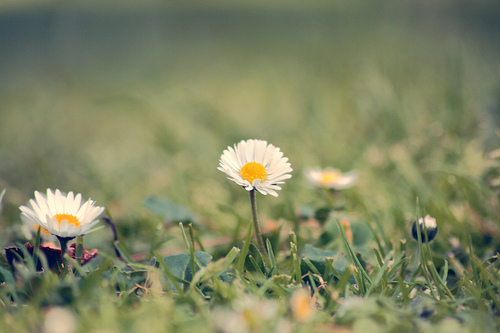

In [66]:
img

In [67]:
img=image.load_img(r'/content/drive/MyDrive/IBM_DATASET/Assignment3/flowers/Testing/daisy/8446495985_f72d851482.jpg',target_size=(64,64))

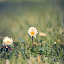

In [68]:
img

In [69]:
x=image.img_to_array(img)

In [70]:
x

array([[[119., 123., 100.],
        [117., 122.,  99.],
        [116., 119.,  98.],
        ...,
        [ 85.,  85.,  85.],
        [ 74.,  85.,  79.],
        [ 67.,  82.,  79.]],

       [[100., 106.,  92.],
        [100., 108.,  95.],
        [ 99., 105.,  95.],
        ...,
        [ 73.,  86.,  79.],
        [ 70.,  80.,  81.],
        [ 63.,  79.,  78.]],

       [[ 77.,  92.,  87.],
        [ 76.,  91.,  88.],
        [ 75.,  91.,  88.],
        ...,
        [ 65.,  79.,  79.],
        [ 63.,  77.,  77.],
        [ 59.,  75.,  75.]],

       ...,

       [[129., 133.,  83.],
        [154., 144.,  95.],
        [126., 130.,  80.],
        ...,
        [109., 119.,  85.],
        [ 98., 109.,  95.],
        [ 89.,  98.,  69.]],

       [[127., 132.,  78.],
        [143., 141.,  93.],
        [145., 145.,  83.],
        ...,
        [108., 124.,  85.],
        [ 98., 109.,  95.],
        [ 86., 103.,  84.]],

       [[133., 135.,  85.],
        [134., 130.,  83.],
        [143., 1

In [71]:
x.shape

(64, 64, 3)

In [72]:
x= np.expand_dims(x,axis=0)

In [73]:
x

array([[[[119., 123., 100.],
         [117., 122.,  99.],
         [116., 119.,  98.],
         ...,
         [ 85.,  85.,  85.],
         [ 74.,  85.,  79.],
         [ 67.,  82.,  79.]],

        [[100., 106.,  92.],
         [100., 108.,  95.],
         [ 99., 105.,  95.],
         ...,
         [ 73.,  86.,  79.],
         [ 70.,  80.,  81.],
         [ 63.,  79.,  78.]],

        [[ 77.,  92.,  87.],
         [ 76.,  91.,  88.],
         [ 75.,  91.,  88.],
         ...,
         [ 65.,  79.,  79.],
         [ 63.,  77.,  77.],
         [ 59.,  75.,  75.]],

        ...,

        [[129., 133.,  83.],
         [154., 144.,  95.],
         [126., 130.,  80.],
         ...,
         [109., 119.,  85.],
         [ 98., 109.,  95.],
         [ 89.,  98.,  69.]],

        [[127., 132.,  78.],
         [143., 141.,  93.],
         [145., 145.,  83.],
         ...,
         [108., 124.,  85.],
         [ 98., 109.,  95.],
         [ 86., 103.,  84.]],

        [[133., 135.,  85.],
       

In [74]:
x.shape

(1, 64, 64, 3)

In [75]:
y= np.argmax(model.predict(x),axis=1)

In [76]:
y

array([0])

In [77]:
x_train.class_indices

{'daisy': 0, 'dandelion': 1, 'rose': 2, 'sunflower': 3, 'tulip': 4}

In [79]:
index=['daisy','dandelion','rose','sunflower','tulip']


In [80]:
index[y[0]]

'daisy'

In [82]:
img=image.load_img(r'/content/drive/MyDrive/IBM_DATASET/Assignment3/flowers/Testing/rose/8063462557_e0a8bd6c64_n.jpg',target_size=(64,64))

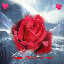

In [83]:
img

In [84]:
x=image.img_to_array(img)

In [85]:
x=np.expand_dims(x,axis=0)

In [86]:
y=np.argmax(model.predict(x),axis=1)

In [87]:
y

array([2])

In [88]:
index=['daisy','dandelion','rose','sunflower','tulip']


In [89]:
index[y[0]]

'rose'